In [12]:
#  !pip3 install networkx
#  !pip3 install numpy
#  !pip3 install matplotlib
#  !pip3 install pygad

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pygad



In [13]:
graph = nx.Graph()

graph.add_node(1)
graph.add_node(2)
graph.add_node(3)
graph.add_node(4)
graph.add_node(5)
graph.add_node(6)
graph.add_node(7)
graph.add_node(8)
graph.add_node(9)
graph.add_node(10)

graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(1, 6)
graph.add_edge(1, 7)

graph.add_edge(2, 5)

graph.add_edge(3, 4)
graph.add_edge(3, 6)
graph.add_edge(3, 7)

graph.add_edge(4, 5)
graph.add_edge(4, 6)
graph.add_edge(4, 7)
graph.add_edge(4, 8)

graph.add_edge(5, 7)
graph.add_edge(5, 8)
graph.add_edge(5, 10)

graph.add_edge(6, 7)
graph.add_edge(6, 9)

graph.add_edge(7, 9)

graph.add_edge(8, 10)

graph.add_edge(9, 10)

weights = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
nx.set_node_attributes(graph, weights, 'weight')


In [14]:
def get_graph():
    return graph.copy()

In [15]:
def adjacent_nodes(node):
    return [neighbor for neighbor in graph.neighbors(node)]

In [16]:
def check_conflicts(solution):
    conflicts = 0
    for i in range(1, 10):
        adj_nodes = adjacent_nodes(i)
        weight = solution[i-1]
        for node in adj_nodes:
            if (node > i and solution[node-1] == weight):
                conflicts+=1
    if conflicts == 0:
        return 2
    return 1 / conflicts

In [17]:
def minimize_colors_weight(solution):
    colors = set(solution)
    if sum(colors) == 0:
        return 2
    return 1 / sum(colors)

In [18]:
def minimize_colors(solution):
    colors = set(solution)
    return 1 / len(colors)

In [19]:
def fitness_function(GA, solution, iteration):
    conflicts = check_conflicts(solution)
    colors_weight = minimize_colors(solution)
    colors_num = minimize_colors_weight(solution)
    return 0.4 * conflicts + 0.3 * colors_weight + 0.3 * colors_num


In [20]:
def run_ga(num_generations = 300, num_parents_mating = 5, sol_per_pop = 30,
           crossover_type="two_points", crossover_probability=0.7,
           mutation_type="random",  mutation_probability=0.4,
           parent_selection_type = "tournament", K_tournament = 3,
           keep_elitism = 1):

  num_genes = len(graph.nodes)
  gene_space = range(0, 21) # so model have higher chances to find at least smth

  # Create the GA instance
  ga_instance = pygad.GA(num_generations=num_generations,
                         num_parents_mating=num_parents_mating,
                         fitness_func=fitness_function,
                         sol_per_pop=sol_per_pop,
                         num_genes=num_genes,
                         keep_elitism = keep_elitism,
                         crossover_type=crossover_type,
                         crossover_probability = crossover_probability,
                         mutation_type=mutation_type,
                         mutation_probability=mutation_probability,
                         gene_space=gene_space,
                         parent_selection_type = parent_selection_type,
                         K_tournament = K_tournament,
                         gene_type=int)

  ga_instance.run()

  solution, solution_fitness, solution_idx = ga_instance.best_solution()

  title = f"Crossover: {crossover_type}"
  title += f" Rate: {crossover_probability}\n"
  title += f"Mutation: {mutation_type} "
  title += f"Rate: {mutation_probability}\n"
  title += f"Population: {sol_per_pop}\n"
  title += f"Parent selection: {parent_selection_type}\n"
  title += f"keep elitism: {keep_elitism}\n"
  if (parent_selection_type=="tournament"):
    title+=f"tournament size: {K_tournament}"

  ga_instance.plot_fitness(title = title)

  print("Best solution:", solution)
  print("Best solution fitness:", solution_fitness)
  print("Conflicts:", 1/check_conflicts(solution))
  print("Min colors weight:", 1/minimize_colors_weight(solution))
  print("Min colors num:", 1/minimize_colors(solution))

  return solution

/Users/nikitagogula/Library/Python/3.9/lib/python/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


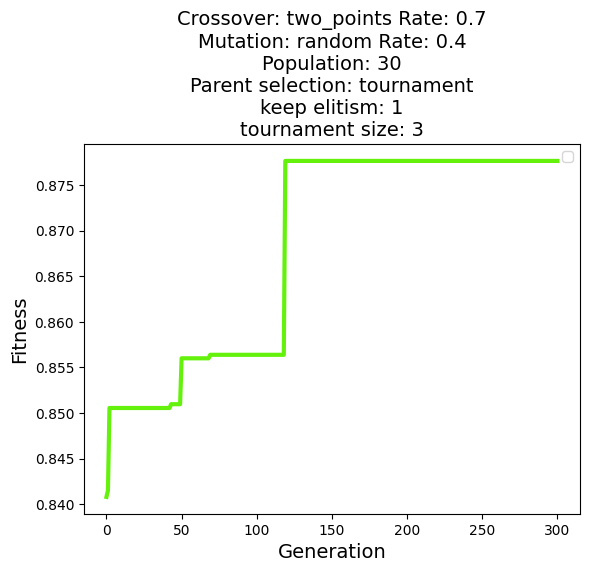

Best solution: [1 0 5 0 7 7 4 1 5 4]
Best solution fitness: 0.8776470588235296
Conflicts: 0.5
Min colors weight: 17.0
Min colors num: 5.0


In [22]:
solution = run_ga()

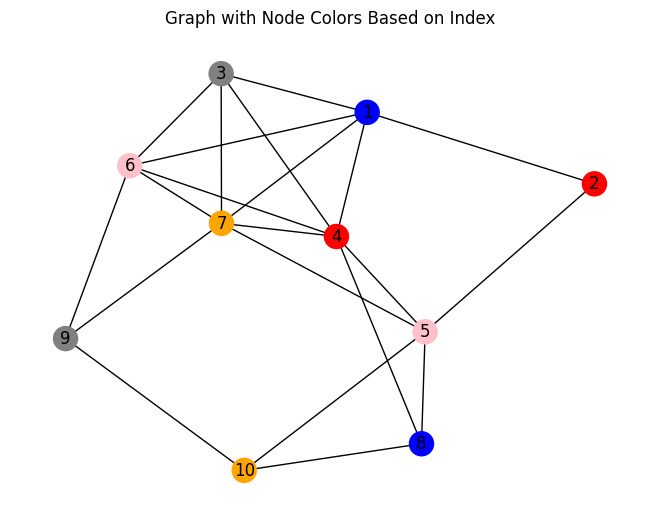

In [25]:
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'grey', 'white', 'pink', 'purple', 'brown',
          'cyan', 'magenta', 'lime', 'gold', 'teal', 'salmon', 'indigo', 'turquoise', 'peru', 'olive']


node_colors = [colors[solution[node_index-1] % len(colors)] for node_index in graph.nodes]

nx.draw(graph, with_labels=True, node_color=node_colors)

plt.title('Graph with Node Colors Based on Index')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


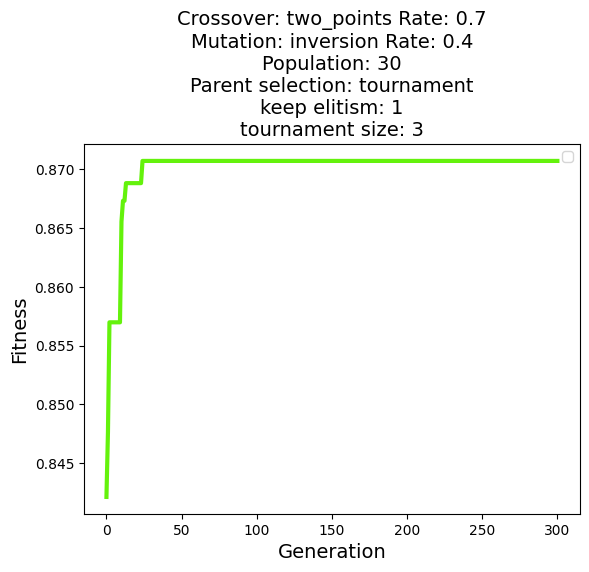

Best solution: [11  5  1  9  1  5  2  5  1  9]
Best solution fitness: 0.8707142857142858
Conflicts: 0.5
Min colors weight: 28.0
Min colors num: 5.0


In [26]:
solution = run_ga(crossover_type="two_points",
           mutation_type="inversion")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


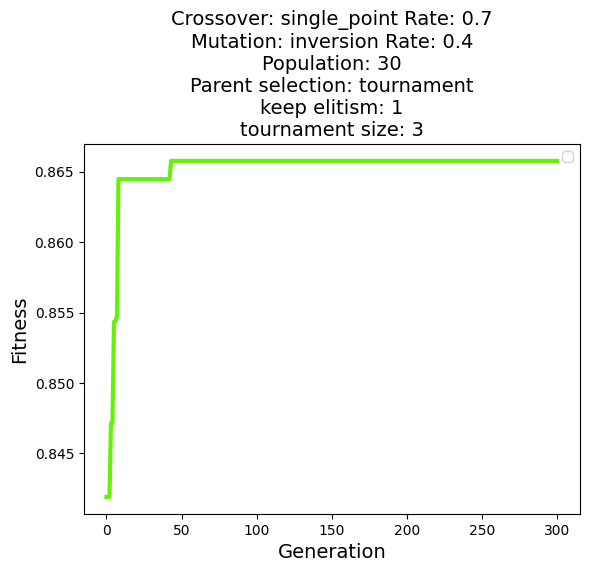

Best solution: [ 2 13 18 13 18  7 12  7  2 13]
Best solution fitness: 0.8657692307692308
Conflicts: 0.5
Min colors weight: 52.0
Min colors num: 5.0


In [27]:
solution = run_ga(crossover_type="single_point",
           mutation_type="inversion")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


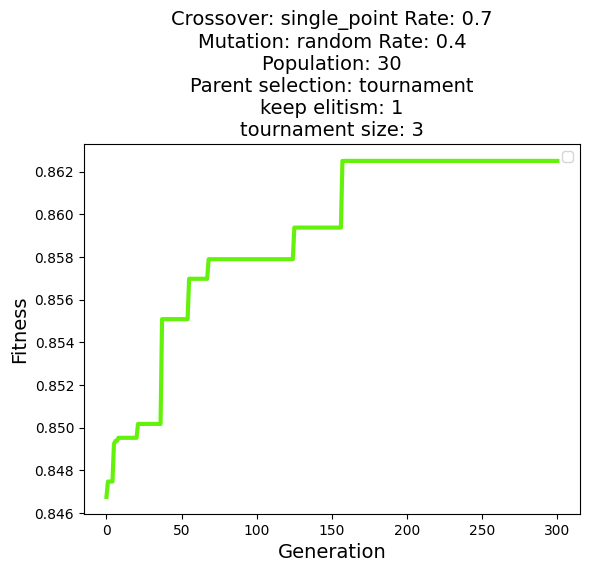

Best solution: [8 3 3 7 4 4 2 8 0 2]
Best solution fitness: 0.8625
Conflicts: 0.5
Min colors weight: 24.0
Min colors num: 6.0


In [28]:
solution = run_ga(crossover_type="single_point",
           mutation_type="random")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


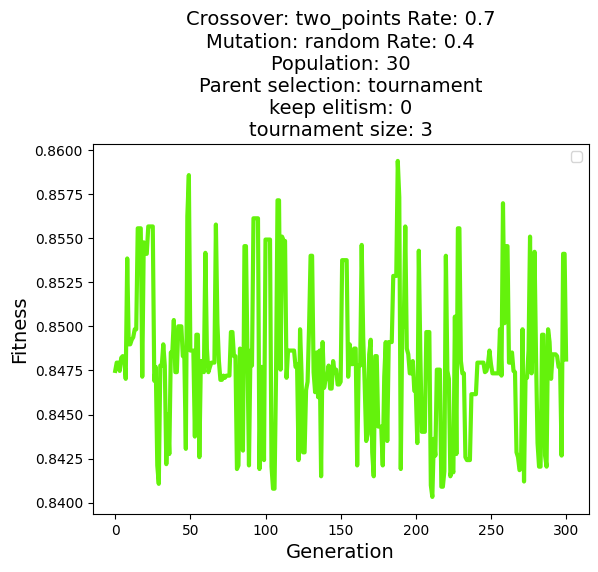

Best solution: [14  4  4 15  6 12  5  1  1  4]
Best solution fitness: 0.8481203007518797
Conflicts: 0.5
Min colors weight: 57.0
Min colors num: 7.0


In [29]:
solution = run_ga(keep_elitism=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


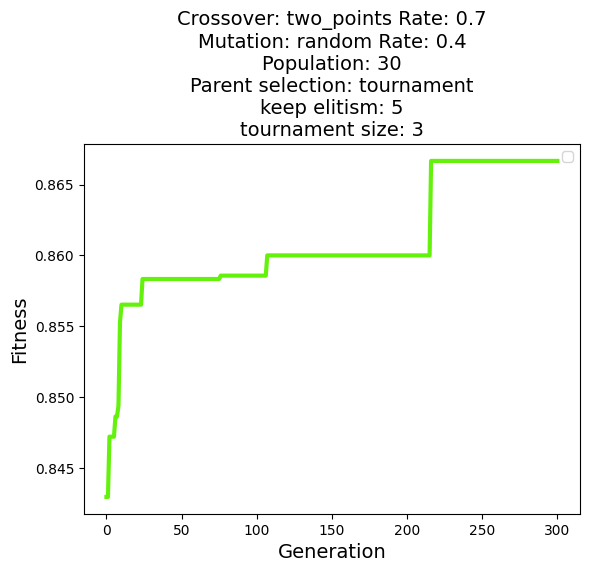

Best solution: [ 0  3  9 15 18 18  3  3  0 15]
Best solution fitness: 0.8666666666666668
Conflicts: 0.5
Min colors weight: 45.0
Min colors num: 5.0


In [30]:
solution = run_ga(keep_elitism=5)

/Users/nikitagogula/Library/Python/3.9/lib/python/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


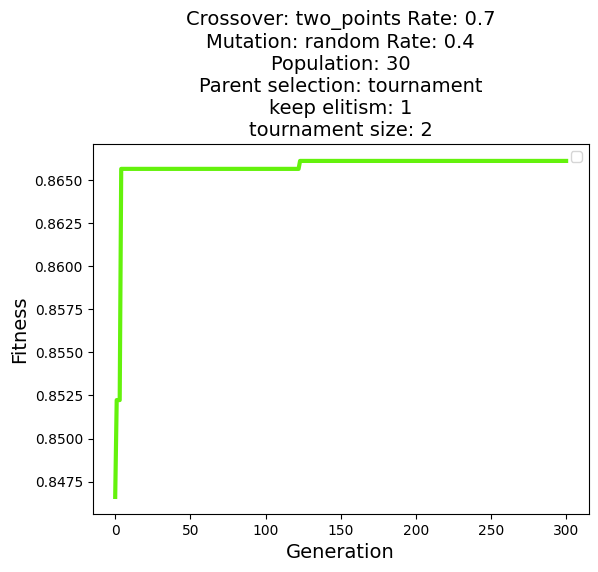

Best solution: [16  3  8 15  8  7  3  3  8 15]
Best solution fitness: 0.8661224489795919
Conflicts: 0.5
Min colors weight: 49.00000000000001
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


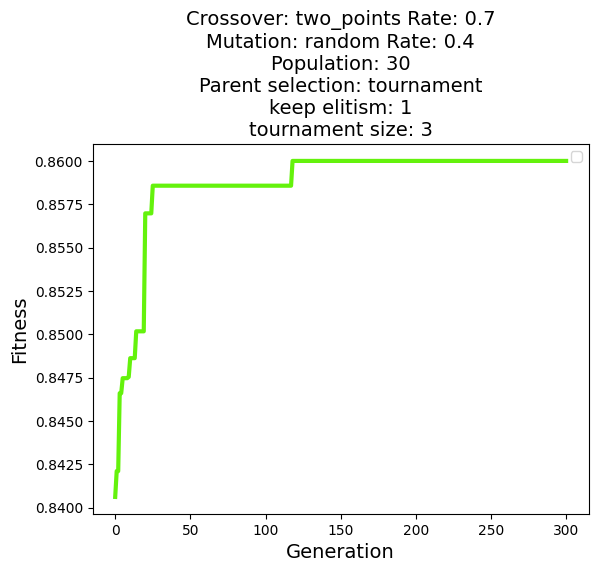

Best solution: [ 8 10  1  6  0 10  5  5  1  8]
Best solution fitness: 0.8600000000000001
Conflicts: 0.5
Min colors weight: 30.0
Min colors num: 6.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


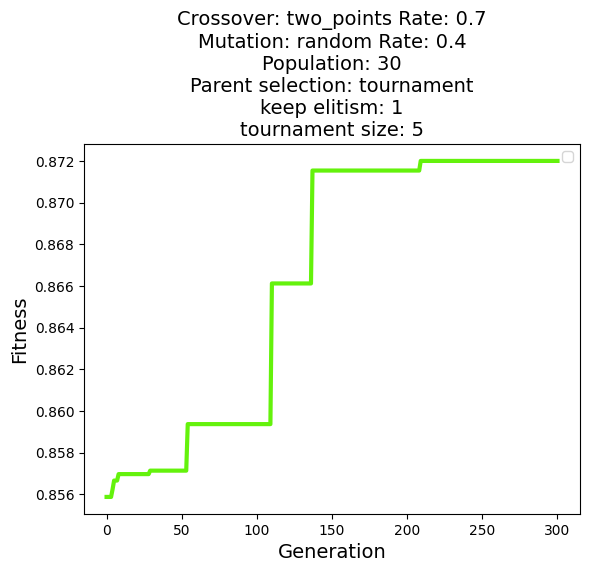

Best solution: [ 5 10 10  1  5  6  3  3  1  6]
Best solution fitness: 0.8720000000000001
Conflicts: 0.5
Min colors weight: 25.0
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


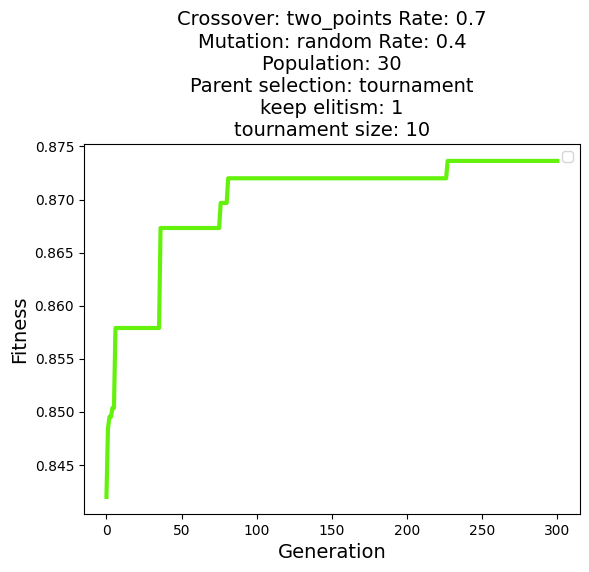

Best solution: [10  1  0  1 10  6  5  6 10  1]
Best solution fitness: 0.8736363636363638
Conflicts: 0.5
Min colors weight: 22.0
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


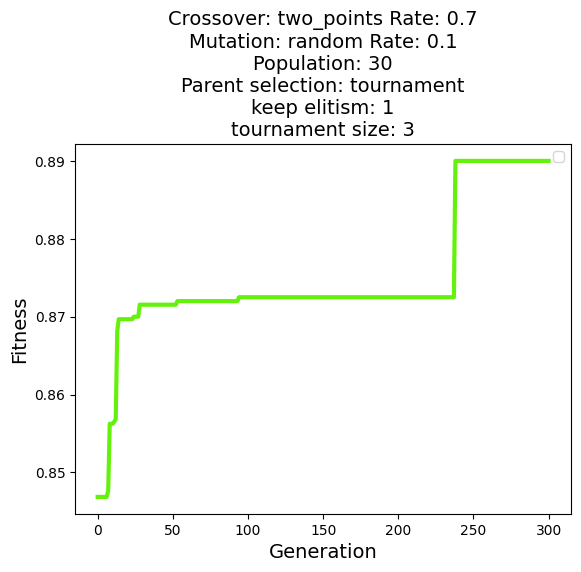

Best solution: [1 4 0 3 1 4 2 4 3 2]
Best solution fitness: 0.8900000000000001
Conflicts: 0.5
Min colors weight: 10.0
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


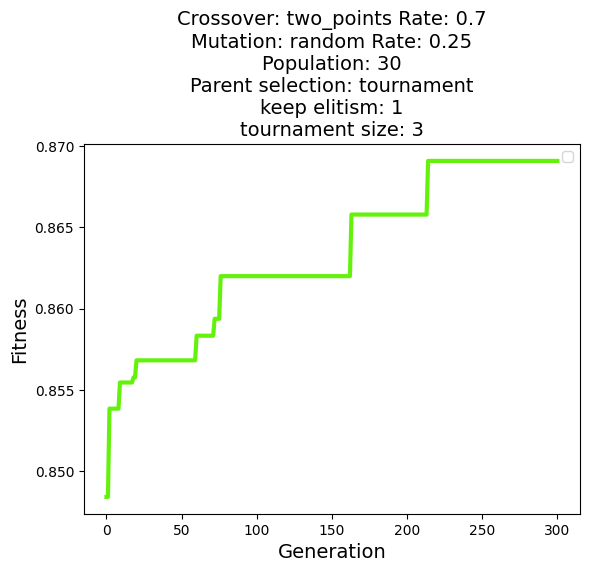

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best solution: [ 2 19  0  8  2 19  4 19  0  4]
Best solution fitness: 0.8690909090909091
Conflicts: 0.5
Min colors weight: 33.0
Min colors num: 5.0


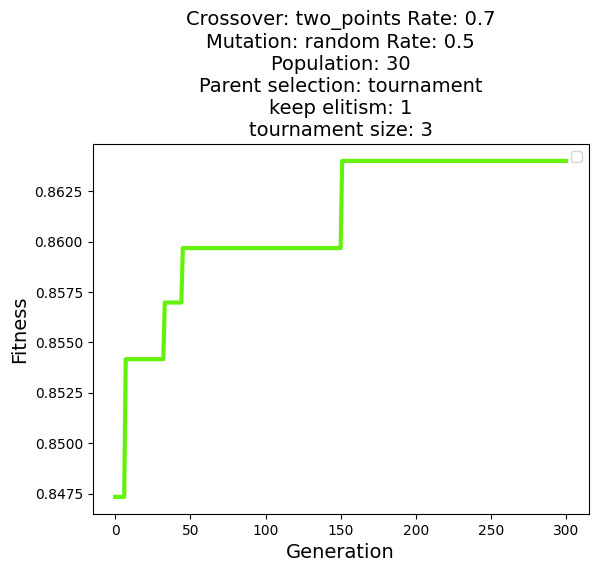

Best solution: [14 20 20 12 14 18 11 11 12 18]
Best solution fitness: 0.8640000000000001
Conflicts: 0.5
Min colors weight: 75.0
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


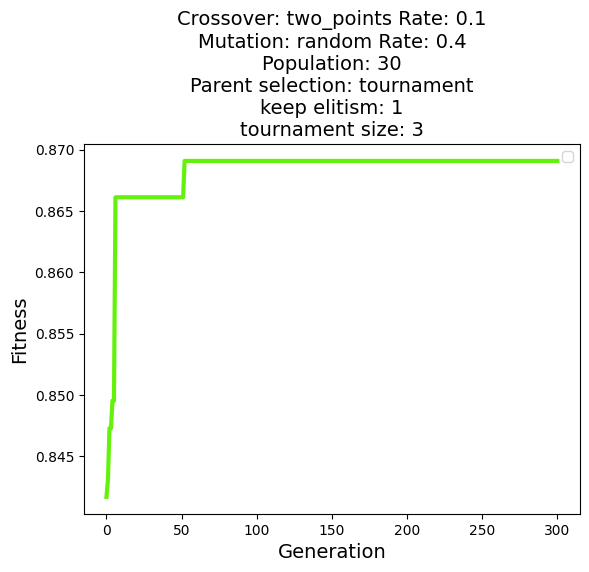

Best solution: [ 3 19 19  4  7  7  0  3 19  4]
Best solution fitness: 0.8690909090909091
Conflicts: 0.5
Min colors weight: 33.0
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


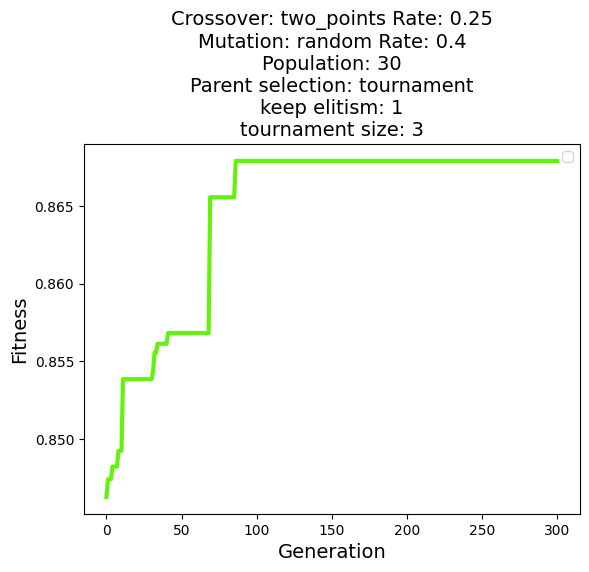

Best solution: [ 9 14 14  0  9  8  7 14  9  8]
Best solution fitness: 0.8678947368421054
Conflicts: 0.5
Min colors weight: 38.0
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


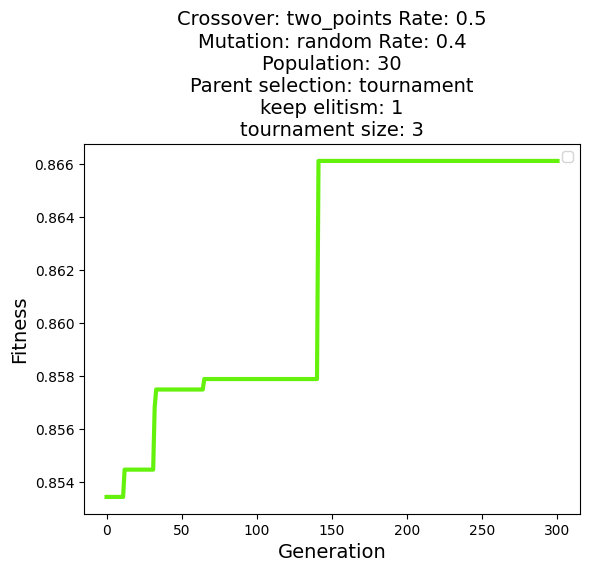

Best solution: [11  1  1  8 11 19 10  1  1 19]
Best solution fitness: 0.8661224489795919
Conflicts: 0.5
Min colors weight: 49.00000000000001
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


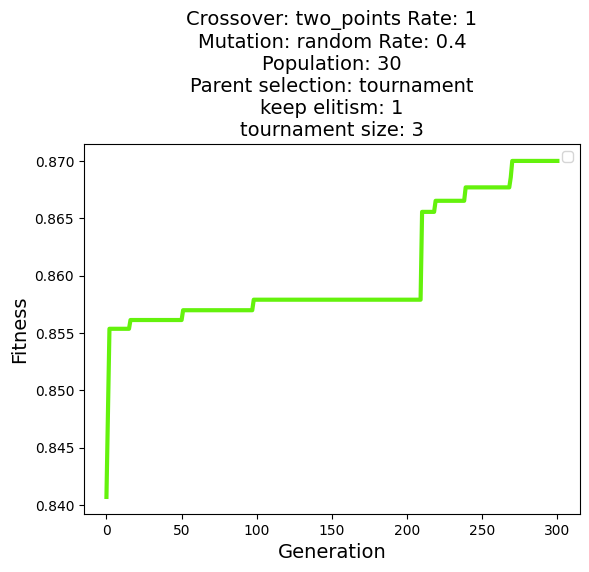

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best solution: [ 7  0 16  5 16  0  2  0 16  5]
Best solution fitness: 0.8700000000000001
Conflicts: 0.5
Min colors weight: 30.0
Min colors num: 5.0


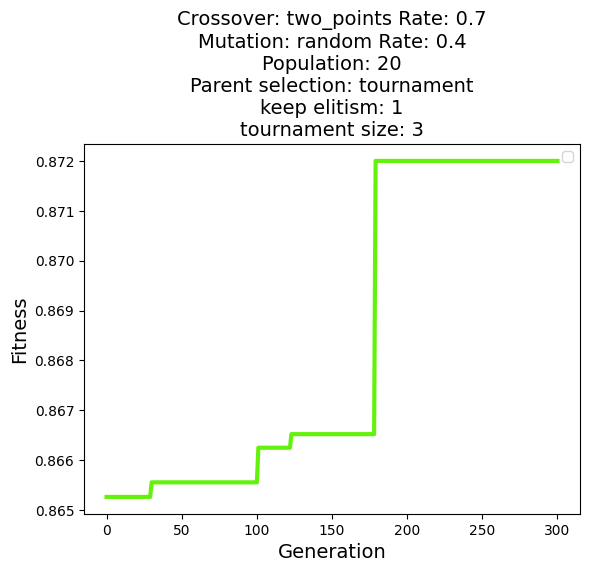

Best solution: [6 2 9 2 7 7 1 9 9 6]
Best solution fitness: 0.8720000000000001
Conflicts: 0.5
Min colors weight: 25.0
Min colors num: 5.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


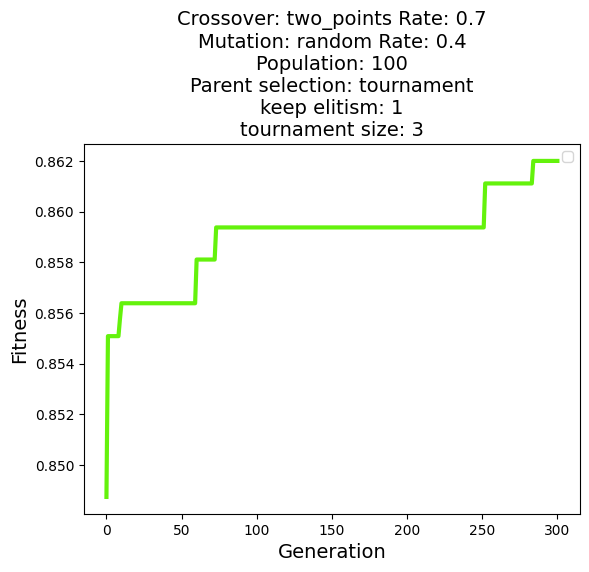

Best solution: [ 3  2  0  6 10  2  4  4  3  6]
Best solution fitness: 0.8620000000000001
Conflicts: 0.5
Min colors weight: 25.0
Min colors num: 6.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


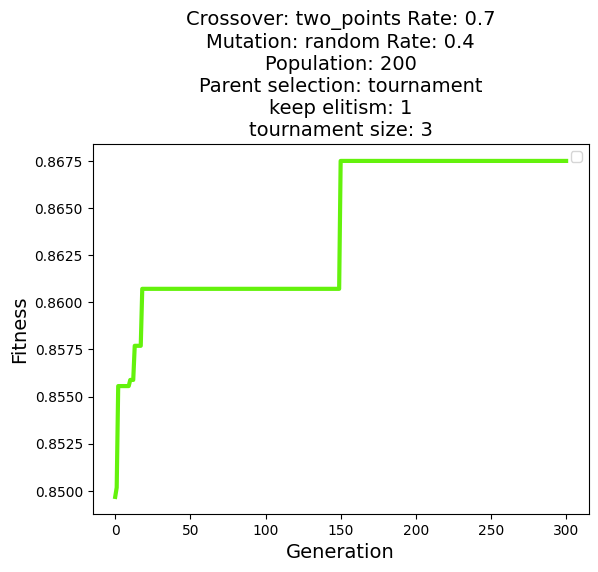

Best solution: [ 5  8  9  7  5  8 11  9  7  8]
Best solution fitness: 0.8675
Conflicts: 0.5
Min colors weight: 40.0
Min colors num: 5.0


In [32]:
def main():
    population_numbers = [20, 100, 200]
    mutation_rates = [0.1, 0.25, 0.5]
    cross_rates = [0.1, 0.25, 0.5, 1]
    tournament_size = [2, 3, 5, 10]
    for i in tournament_size:
        run_ga(K_tournament=i)
    for i in mutation_rates:
        run_ga(mutation_probability=i)
    for i in cross_rates:
        run_ga(crossover_probability=i)
    for i in population_numbers:
        run_ga(sol_per_pop=i)

main()